# Visulization and plotting

In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
# to show mtplotlib in line
%matplotlib inline 
sns.set(color_codes=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_788\3509144420.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read data

In [2]:
mli_accled = gpd.read_file("data/tmp/mli_accled.geojson")

In [3]:
mli_accled.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   event_date          4209 non-null   object  
 1   event_id_cnty       4209 non-null   object  
 2   year                4209 non-null   object  
 3   time_precision      4209 non-null   object  
 4   disorder_type       4209 non-null   object  
 5   event_type          4209 non-null   object  
 6   sub_event_type      4209 non-null   object  
 7   actor1              4209 non-null   object  
 8   assoc_actor_1       4209 non-null   object  
 9   inter1              4209 non-null   object  
 10  actor2              4209 non-null   object  
 11  assoc_actor_2       4209 non-null   object  
 12  inter2              4209 non-null   object  
 13  interaction         4209 non-null   object  
 14  civilian_targeting  4209 non-null   object  
 15  iso                 4209 non-n

## Data prepartion

In [4]:
mli_accled.event_date = pd.to_datetime(mli_accled.event_date)

In [5]:
mli_accled.event_date

0      2022-01-02
1      2022-01-03
2      2022-01-03
3      2022-01-03
4      2022-01-03
          ...    
4204   2024-01-11
4205   2024-01-11
4206   2024-01-12
4207   2024-01-12
4208   2024-01-12
Name: event_date, Length: 4209, dtype: datetime64[ns]

In [6]:
mli_accled

,event_date,event_id_cnty,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,geometry
0,2022-01-02,MLI6031,2022,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,,2,...,14.08,-3.955,2,Twitter,New media,"On 2 January 2022, a Malian army vehicle struc...",0,,1641863888,POINT (-3.95500 14.08000)
1,2022-01-03,MLI6032,2022,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,,2,...,13.9898,-4.3741,2,Twitter; Menastream; Radio Guintan,Local partner-New media,"On 3 January 2022, JNIM militants attacked Don...",6,,1641863884,POINT (-4.37410 13.98980)
2,2022-01-03,MLI6033,2022,1,Political violence,Violence against civilians,Attack,Islamic State (West Africa) - Greater Sahara F...,,2,...,15.8197,-0.41,1,Radio Guintan; Whatsapp; Undisclosed Source,Local partner-Other,"On 3 January 2022, ISWAP (Greater Sahara) mili...",1,,1641863884,POINT (-0.41000 15.81970)
3,2022-01-03,MLI6035,2022,1,Political violence,Violence against civilians,Attack,Islamic State (West Africa) - Greater Sahara F...,,2,...,15.8092,-0.4278,1,Whatsapp; Radio Guintan; Undisclosed Source,Local partner-Other,"On 3 January 2022, ISWAP (Greater Sahara) mili...",1,,1641863884,POINT (-0.42780 15.80920)
4,2022-01-03,MLI6036,2022,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,,2,...,14.0615,-3.7861,2,Twitter; RFI,New media-International,"On 3 January 2022, JNIM militants detonated an...",10,,1648493877,POINT (-3.78610 14.06150)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,2024-01-11,MLI31701,2024,1,Political violence,Violence against civilians,Attack,Islamic State (Sahel),,2,...,16.0392,0.0695,1,Studio Tamani; Undisclosed Source,Local partner-Other,"On 11 January 2024, IS Sahel militants killed ...",1,,1705371872,POINT (0.06950 16.03920)
4205,2024-01-11,MLI31690,2024,1,Political violence,Battles,Armed clash,Islamic State (Sahel),,2,...,16.2717,-0.0447,2,Undisclosed Source,Local partner-Other,"On 11 January 2024, IS Sahel militants clashed...",7,,1705371872,POINT (-0.04470 16.27170)
4206,2024-01-12,MLI31700,2024,1,Political violence,Violence against civilians,Attack,Dozo Communal Militia (Mali),,4,...,13.8286,-4.9953,2,Whatsapp,New media,"On 12 January 2024, Dozo militia wounded one p...",0,,1705371872,POINT (-4.99530 13.82860)
4207,2024-01-12,MLI31697,2024,1,Strategic developments,Strategic developments,Arrests,Military Forces of Mali (2021-),Wagner Group,1,...,14.426,-6.1063,1,Whatsapp,New media,"On 12 January 2024, FAMa and Wagner forces arr...",0,,1705371872,POINT (-6.10630 14.42600)


## Making a plot

**Manauly build a histogram to take a look on distribution**


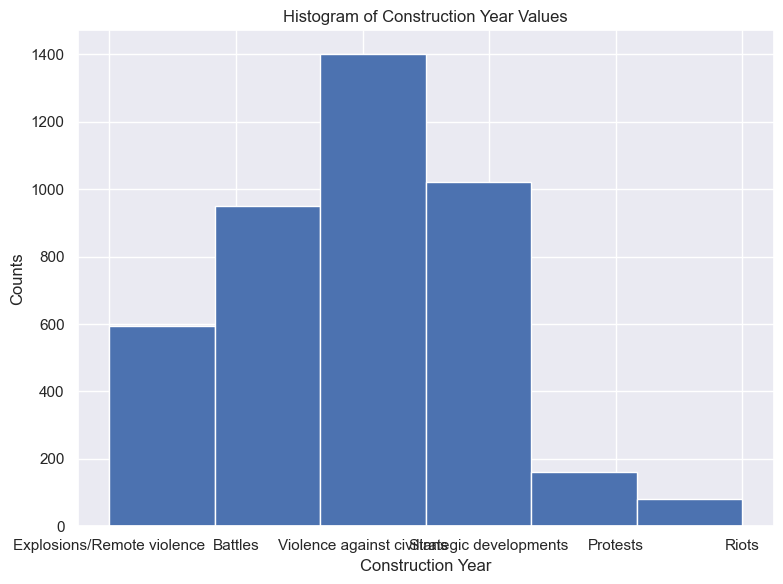

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

mli_accled['event_type'].hist(ax=ax, bins=6)

# lbavels
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12) 
plt.title('Histogram of Construction Year Values', fontsize=12) 
plt.tight_layout()

**Plot as function with Seaborn**

In [8]:
def hist_plot_mpl(data: gpd.GeoDataFrame, x:str)-> None:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(data, x=x, bins=len(data[x].unique()), ax=ax)
    plt.title(f'Histogram of {x}', fontsize=12) 
    plt.tight_layout()

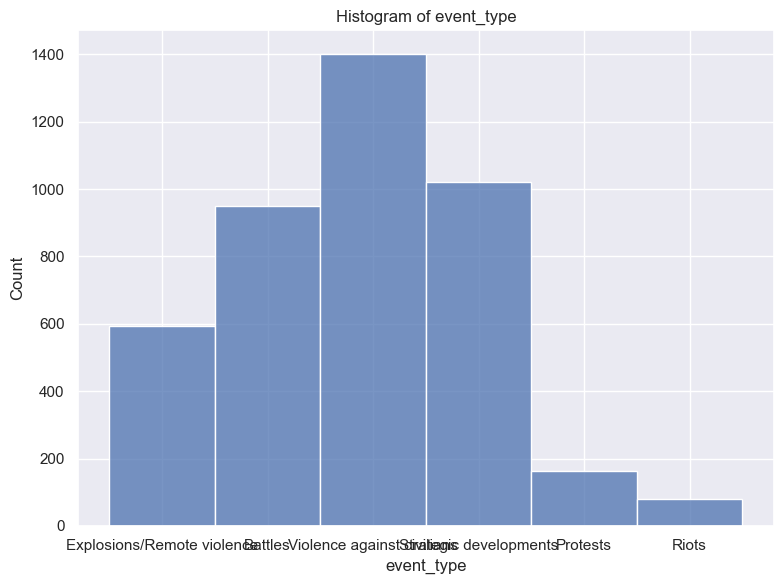

In [9]:
hist_plot_mpl(mli_accled, 'event_type')

## Reuse function from external file 

You can import your custom function from modules located in the Lab directory.
Due to the philosophy of Jupytern is sometime necessary to reload kernel

In [10]:
from helper.plots import hist_plot

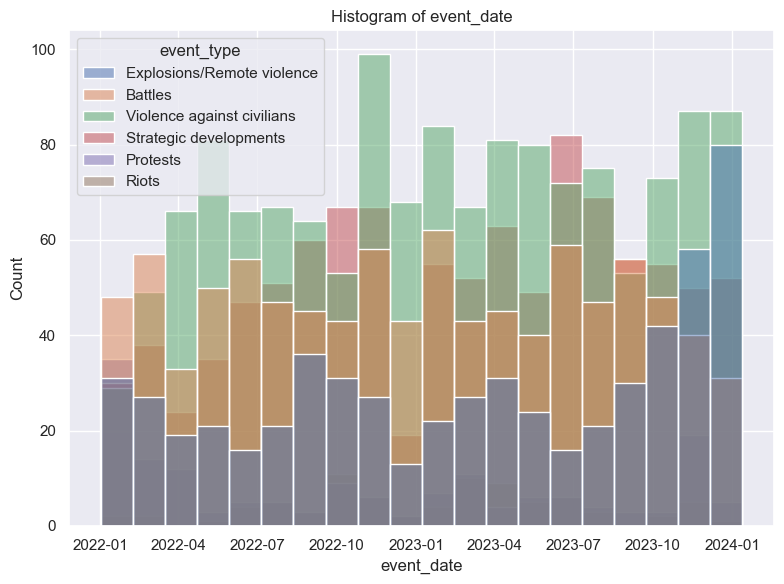

In [11]:
hist_plot(mli_accled,'event_date', 'event_type')

Good but we want to specify time to have reasonable periods. To achieve this, best approach is a pivot table

In [13]:
mli_accled.event_date = pd.to_datetime(mli_accled.event_date)

In [15]:
mli_accled['event_month'] = mli_accled.event_date.dt.to_period('M')

In [16]:
mli_accled

,event_date,event_id_cnty,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,geometry,event_month
0,2022-01-02,MLI6031,2022,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,,2,...,-3.955,2,Twitter,New media,"On 2 January 2022, a Malian army vehicle struc...",0,,1641863888,POINT (-3.95500 14.08000),2022-01
1,2022-01-03,MLI6032,2022,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,,2,...,-4.3741,2,Twitter; Menastream; Radio Guintan,Local partner-New media,"On 3 January 2022, JNIM militants attacked Don...",6,,1641863884,POINT (-4.37410 13.98980),2022-01
2,2022-01-03,MLI6033,2022,1,Political violence,Violence against civilians,Attack,Islamic State (West Africa) - Greater Sahara F...,,2,...,-0.41,1,Radio Guintan; Whatsapp; Undisclosed Source,Local partner-Other,"On 3 January 2022, ISWAP (Greater Sahara) mili...",1,,1641863884,POINT (-0.41000 15.81970),2022-01
3,2022-01-03,MLI6035,2022,1,Political violence,Violence against civilians,Attack,Islamic State (West Africa) - Greater Sahara F...,,2,...,-0.4278,1,Whatsapp; Radio Guintan; Undisclosed Source,Local partner-Other,"On 3 January 2022, ISWAP (Greater Sahara) mili...",1,,1641863884,POINT (-0.42780 15.80920),2022-01
4,2022-01-03,MLI6036,2022,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,,2,...,-3.7861,2,Twitter; RFI,New media-International,"On 3 January 2022, JNIM militants detonated an...",10,,1648493877,POINT (-3.78610 14.06150),2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,2024-01-11,MLI31701,2024,1,Political violence,Violence against civilians,Attack,Islamic State (Sahel),,2,...,0.0695,1,Studio Tamani; Undisclosed Source,Local partner-Other,"On 11 January 2024, IS Sahel militants killed ...",1,,1705371872,POINT (0.06950 16.03920),2024-01
4205,2024-01-11,MLI31690,2024,1,Political violence,Battles,Armed clash,Islamic State (Sahel),,2,...,-0.0447,2,Undisclosed Source,Local partner-Other,"On 11 January 2024, IS Sahel militants clashed...",7,,1705371872,POINT (-0.04470 16.27170),2024-01
4206,2024-01-12,MLI31700,2024,1,Political violence,Violence against civilians,Attack,Dozo Communal Militia (Mali),,4,...,-4.9953,2,Whatsapp,New media,"On 12 January 2024, Dozo militia wounded one p...",0,,1705371872,POINT (-4.99530 13.82860),2024-01
4207,2024-01-12,MLI31697,2024,1,Strategic developments,Strategic developments,Arrests,Military Forces of Mali (2021-),Wagner Group,1,...,-6.1063,1,Whatsapp,New media,"On 12 January 2024, FAMa and Wagner forces arr...",0,,1705371872,POINT (-6.10630 14.42600),2024-01


add colum to count events

In [30]:
mli_accled['event_count'] = 1

In [31]:
pivot_table = mli_accled.groupby(['event_month','event_type']).agg({'fatalities':'sum', 'event_count': 'count'}).reset_index()

In [43]:
pivot_table

,event_month,event_type,fatalities,event_count
0,2022-01-01,Battles,155,36
1,2022-01-01,Explosions/Remote violence,60,26
2,2022-01-01,Protests,0,34
3,2022-01-01,Riots,9,1
4,2022-01-01,Strategic developments,2,24
...,...,...,...,...
141,2023-12-01,Violence against civilians,187,65
142,2024-01-01,Battles,41,10
143,2024-01-01,Explosions/Remote violence,28,23
144,2024-01-01,Strategic developments,0,16


In [41]:
pivot_table.event_month = pivot_table.event_month.astype('datetime64[ns]')

More convenient approach then writing functions is to embrace [seaborn objects interface](https://seaborn.pydata.org/api.html)

In [54]:
import seaborn.objects as so

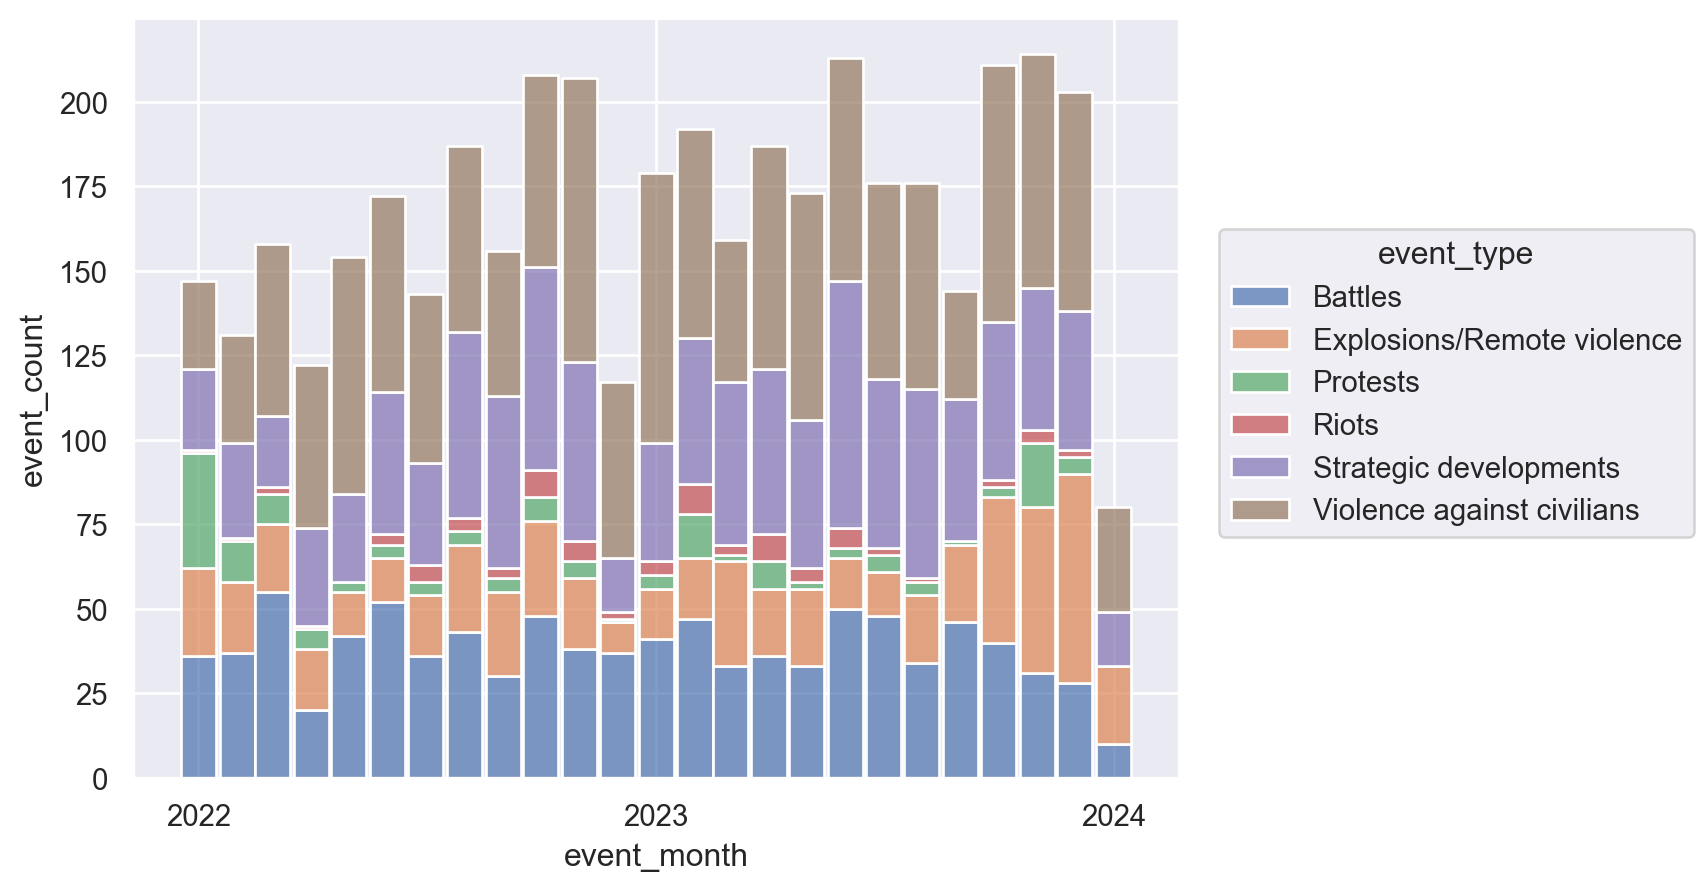

In [60]:
so.Plot(pivot_table, mli_accled.event_month.name, mli_accled.event_count.name).add(so.Bars(), so.Stack(), color=mli_accled.event_type.name)